## REGRESION LOGISTICA (Logistic Regression)

En este modelo utilizaremos el modelo del Titanic. Este es un famoso conjunto de datos muy amenudo, es el primer paso de un estudiante en el machine learning.

Intentaremos predecir una clasificacion: supervivencia o fallecimiento. Conocemos nuestra comprension de la implementacion de regresion logistica en python para la clasificacion.

Usaremos una version 'semi-limpia' del conjunto de datos (titanic), si usamos el conjunto de datos alojado directamente en kaggle, es posible que deba hacer una limpieza adicional que no se muestra en este notebook.

Descripcion del Dataset:

1. PassengerId
2. Pclass: Clase de pasajero (1 = 1ra; 2 = 2da; 3 = 3ra)
3. Survived:(0 = no, 1 = si)
4. Name
5. Sex
6. Age
7. Sibsp: Numero de hermanos/esposa abordo
8. Parch: Numero de familiares
9. ticket
10. fare: Tarifa de pasaje (Libra Esterlina) 
11. Cabin 
12. Embarked: Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

# Tu código aquí

# Restablecer la configuración de advertencias a su estado original (opcional)
warnings.resetwarnings()


In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Datos faltantes
Hacemos una exploracion para identificar los datos faltantes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
## Eliminando valores nulos. TRUE(SI), FALSE(NO)
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# columnas y valores faltantes del dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isnull().sum() / 891
# 891 no es mas que la longitud del dataframe, hicimos la division
# entre los valores faltantes, luego se multiplico por 100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
(df.isnull().sum() / 891) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
len(df)

891

<Axes: >

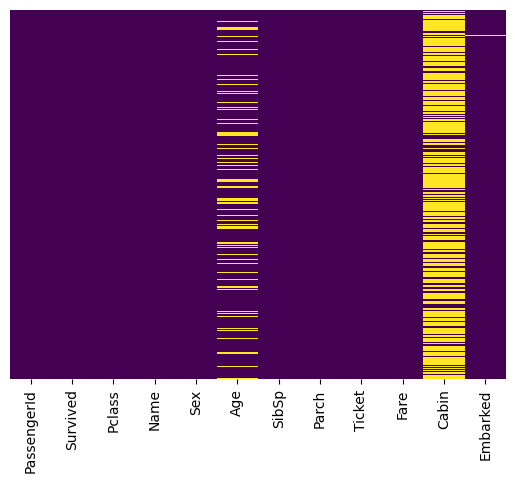

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')
# En este grafico se muestran los valores faltantes
# Las variables cabin y age

Falta aproximadamente el 20% de los datos de Edad. La proporcion de edad que falta es probablemente los suficientemente pequena como para reemplazarla razonablemente con alguna forma de imputacion. En cuanto a la columna Cabina, parece que nos faltan demasiados datos para hacer algo util en un nivel basico. Probablemente eliminaremos esto mas adelante o lo cambiaremos a otra funcion como: "Cabina Conocida 1 o 0"

## Limpieza de datos

Queremos completar los datos de edad que faltan en lugar de simplemente eliminar las filas de datos de edad que faltan. Una forma de hacerlo es completando los datos faltantes con la edad media de todos los pasajeros (imputacion). Sin embargo, podemos ser mas inteligentes al respecto y verificar la edad promedio por clase de pasajero. Por ejemplo:

<Axes: xlabel='Pclass', ylabel='Age'>

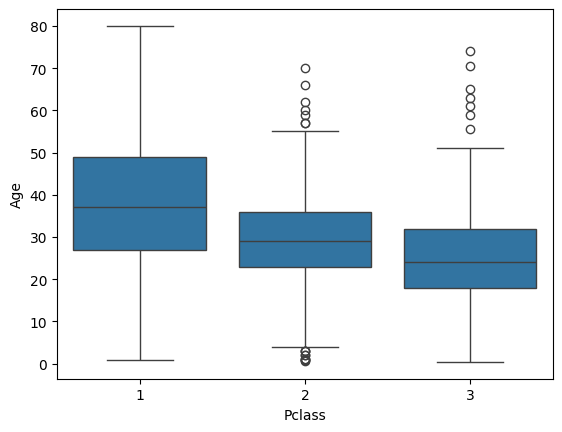

In [12]:
sns.boxplot(x= 'Pclass', y='Age', data = df)
# identificamos ouliers (valores atipicos) en las clases 2 y 3,
# tambien estas clases son las mas jovenes, mientras que los valores
# atipicos estan concentrados en los mayores de 50 a 60 y pico y los bebes de la clase 2

Podemos ver los pasajeros mas ricos de las clases mas altas tienden a ser mayores, lo cual tiene sentido. Usaremos estos valores de edad promedio para imputar segun Pclass for age.

In [13]:
# Agrupa por 'Pclass' y calcula la media de 'Age' para cada grupo
df.groupby('Pclass')['Age'].agg('mean')

# usamos este termino para agrupar los datos en funcion de la clase
# usando el promedio de la edades

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
pd.isnull(df['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [15]:
# definimos una funcion para la imputacion en la edad
# esta funcion va a tomar esas columnas y una de ellas sera la edad
def imputar_edad(columnas):
    
    edad = columnas[0]
    clase = columnas[1]
    
    if pd.isnull(edad):
        
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad

Ahora aplicaremos esta funcion

In [16]:
df['Age'] = df[['Age','Pclass']].apply(imputar_edad, axis = 1)
# df['age'] se igualo la columna edad a este calculo.

/var/folders/v7/j0z8x01j2sjfr3xgq_b0fw700000gn/T/ipykernel_26412/1026759873.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edad = columnas[0]
/var/folders/v7/j0z8x01j2sjfr3xgq_b0fw700000gn/T/ipykernel_26412/1026759873.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clase = columnas[1]


<Axes: >

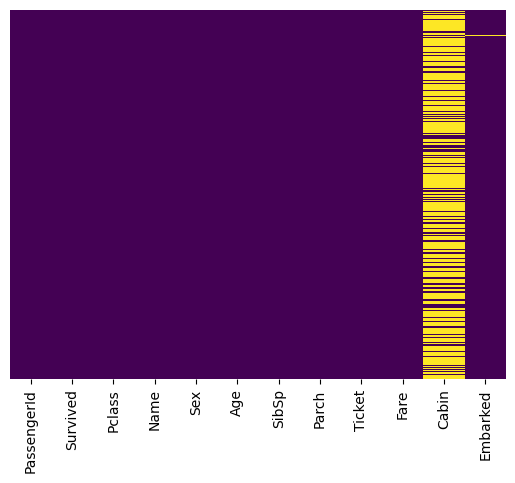

In [17]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

In [18]:
df.drop(columns = ['Cabin'], inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [22]:
df.dropna(inplace=True)
df.reset_index(drop = True,inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


## Construyendo un modelo de regresion Logistica

comencemos dividiendo nuestros datos en un conjunto de entrenamiento y un conjunto de prueba (hay otro archivo test.csv con el que puedes jugar en caso de que quieras usar estos datos para el entrenamiento).

## Division de prueba de entranamiento

In [23]:
columnas_eliminar = ['PassengerId', 'Survived', 'Ticket', 'Name']

X = df.drop(columns = columnas_eliminar)
y = df['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# escribimos train_test_split + shift+tab y saldra lo que esta colocado abajo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [26]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
806,3,female,18.0,0,0,7.775,S
650,2,female,18.0,0,1,23.000,S
2,3,female,26.0,0,0,7.925,S
689,1,male,31.0,1,0,57.000,S
195,3,male,25.0,0,0,7.750,Q


In [27]:
y_train.head()

806    0
650    1
2      1
689    1
195    0
Name: Survived, dtype: int64

## Preprocesamiento de Datos

In [28]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ... (tu código anterior)

# Define los selectores correctamente
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

num_tupla = (scaler, num_selector)
cat_tupla = (ohe, cat_selector)

col_transformer = make_column_transformer(num_tupla, cat_tupla, remainder='passthrough')
col_transformer.fit(X_train)

# Transforma tus datos
X_train_transformada = col_transformer.transform(X_train)
X_test_transformada = col_transformer.transform(X_test)


/Users/josethorex/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
col_transformer.get_feature_names_out()

array(['standardscaler__Pclass', 'standardscaler__Age',
       'standardscaler__SibSp', 'standardscaler__Parch',
       'standardscaler__Fare', 'onehotencoder__Sex_female',
       'onehotencoder__Sex_male', 'onehotencoder__Embarked_C',
       'onehotencoder__Embarked_Q', 'onehotencoder__Embarked_S'],
      dtype=object)

In [30]:
X_test_transformada

array([[ 0.82581213, -0.33146726, -0.48408036, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82581213, -0.33146726, -0.48408036, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36320441, -0.40929027,  0.43953309, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.36320441,  0.05764784, -0.48408036, ...,  0.        ,
         0.        ,  1.        ],
       [-1.55222095,  0.68023199,  0.43953309, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82581213, -1.57663556,  2.28675998, ...,  0.        ,
         0.        ,  1.        ]])

In [31]:
variables = []

for nombre_variable in list(col_transformer.get_feature_names_out()):
    
    nombre_variable_correcto = nombre_variable.replace('standardscaler__',
                                                      '').replace('onehotencoder__','').replace('remainder__',
                                                                                                '')
    variables.append(nombre_variable_correcto)
    
variables

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [32]:
pd.DataFrame(X_train_transformada, columns = variables, index = X_train.index)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
806,0.825812,-0.876228,-0.484080,-0.466368,-0.481863,1.0,0.0,0.0,0.0,1.0
650,-0.363204,-0.876228,-0.484080,0.768019,-0.184331,1.0,0.0,0.0,0.0,1.0
2,0.825812,-0.253644,-0.484080,-0.466368,-0.478932,1.0,0.0,0.0,0.0,1.0
689,-1.552221,0.135471,0.439533,-0.466368,0.480109,0.0,1.0,0.0,0.0,1.0
195,0.825812,-0.331467,-0.484080,-0.466368,-0.482352,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
575,-0.363204,0.368940,-0.484080,-0.466368,-0.379754,1.0,0.0,0.0,0.0,1.0
838,0.825812,-0.720582,-0.484080,-0.466368,-0.478932,0.0,1.0,0.0,0.0,1.0
337,0.825812,1.224993,-0.484080,-0.466368,-0.476489,0.0,1.0,0.0,0.0,1.0
523,0.825812,-0.331467,-0.484080,-0.466368,-0.492529,0.0,1.0,1.0,0.0,0.0


In [33]:
y_train

806    0
650    1
2      1
689    1
195    0
      ..
575    1
838    0
337    1
523    0
863    1
Name: Survived, Length: 622, dtype: int64

In [34]:
X_train_df = pd.DataFrame(X_train_transformada, columns = variables, index = X_train.index)
X_test_df = pd.DataFrame(X_train_transformada, columns = variables, index = X_train.index)

## Entrenamiento y prediccion

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()

logmodel.fit(X_train_df, y_train)

LogisticRegression()

In [37]:
logmodel.coef_

array([[-0.93258155, -0.5322116 , -0.26871036, -0.08043274,  0.07597034,
         1.27208666, -1.27199242,  0.16972636,  0.01574951, -0.18538163]])

In [38]:
y_pred = logmodel.predict(X_test_df)
y_pred
# Aqui tenemos una matriz de 1 y 0, donde 0 el modelo estima que no sobrevivieron
# y para 1, esas personas sobrevivieron.

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

(array([156., 124.,  46.,  38.,  39.,  28.,  56.,  42.,  34.,  59.]),
 array([0.01442022, 0.10959727, 0.20477431, 0.29995135, 0.3951284 ,
        0.49030544, 0.58548248, 0.68065953, 0.77583657, 0.87101361,
        0.96619066]),
 <BarContainer object of 10 artists>)

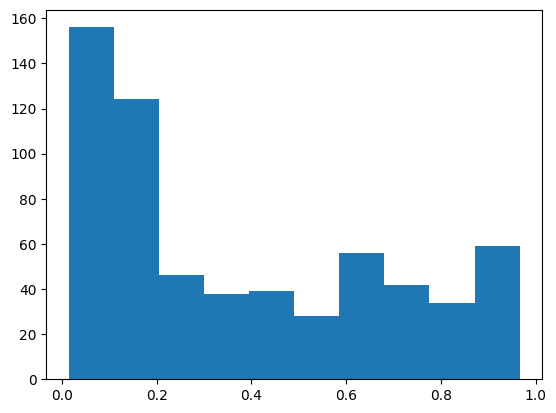

In [39]:
# Esta funcion se utiliza para medir las probabilidades
plt.hist(logmodel.predict_proba(X_test_df)[:,1])


Ahi se puede ver que la mayoria de personasa tienen la probabilidad de morir, mientras que los puntajes mas bajos indican la supervivencia.

In [40]:

pip install plotly --upgrade


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn



Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Would remove:
    /Users/josethorex/anaconda3/lib/python3.11/site-packages/scikit_learn-1.3.2.dist-info/*
    /Users/josethorex/anaconda3/lib/python3.11/site-packages/sklearn/*
Proceed (Y/n)? 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix as plt_confusion_matrix


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
plot_confusion_matrix(logmodel, X_test_df, y_test)